# Lab 4. Work on complex numbers and classes
**Note** This topic is relatively simple, so it is marked out of a total of 7 marks. 

### Extend myComplex
The work is based upon the "myComplex" class defined in the Topic 3 lecture. You should extend the myComplex class and add overloaded methods for the following. Read the documentation at https://docs.python.org/3/library/operator.html to find out how to overload these operators:
   * subtraction 
   * multiplication
   * division

Write methods to calculate:
   * The complex conjugate
   * Rotate the phase of a complex number by an angle given as argument

Perform a few tests with a few example numbers to ensure things work as expected

### Impedence vs frequency
The impedence of an RLC circuit is given by:
$$ Z = R + i \left(\frac{1}{\omega C} - \omega L \right) $$

   * Write a functions that calculates Z, given the four parameters R, L, C, omega
   * Fix L = 1000H, C=1 mF, R=480 Ohm. Plot the modulus of Z vs omega
   * Repeat with R=120 Ohm and 960 Ohm (and L=1000H and C=1 mF)
   * Repeat with L=200 H and L=2000 H (and R=480 Ohm and C=1 mF)
   * Plot the phase of Z vs omega
   * Repeat the 3 points above using the python cmath.complex type

Plot mod Z vs omega, for L = 1000H, C=1 mF, R=480 Ohm


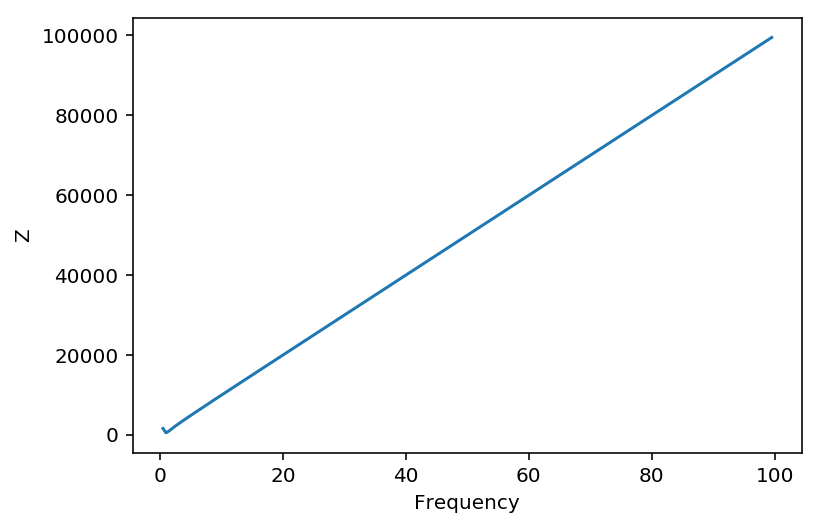

Repeat with R=120 Ohm


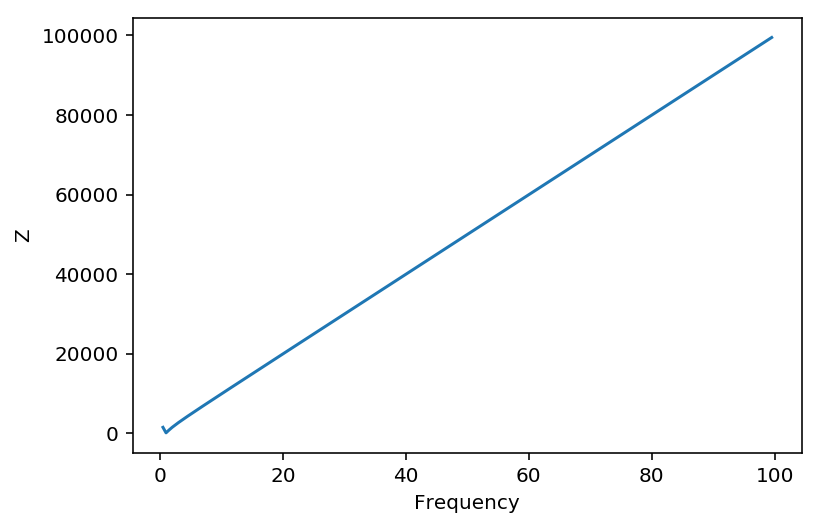

and 960 Ohm


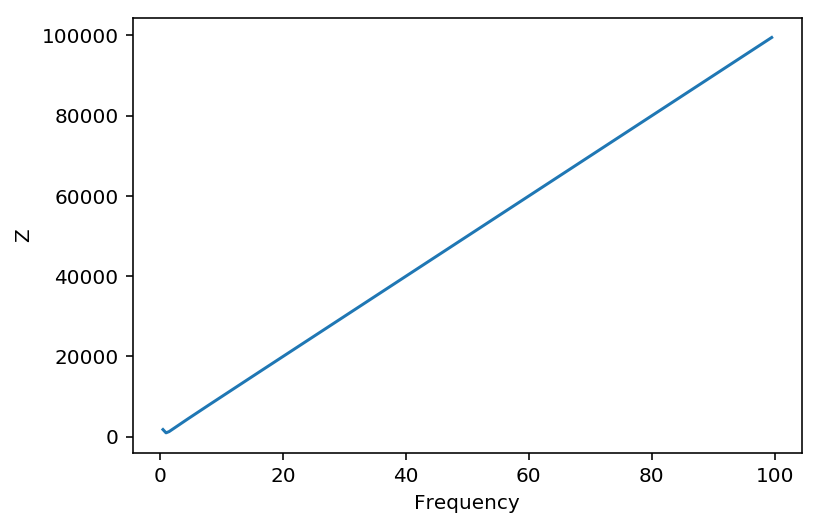

Repeat with L=200 H


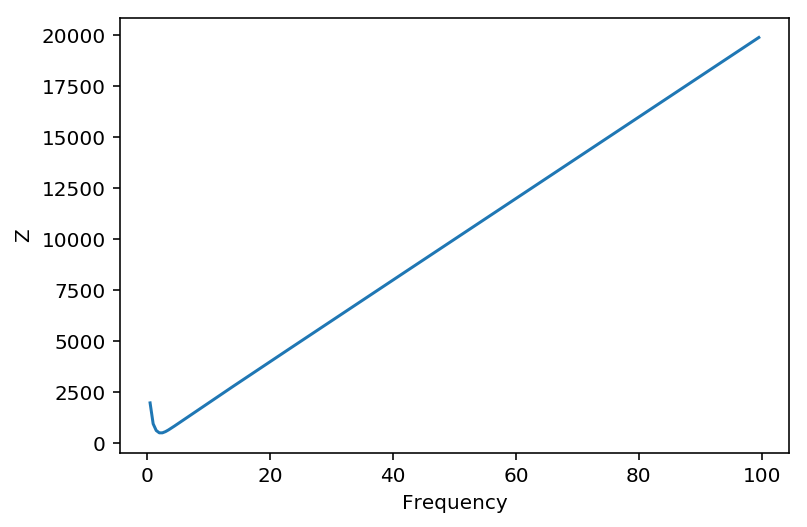

and L=2000 H


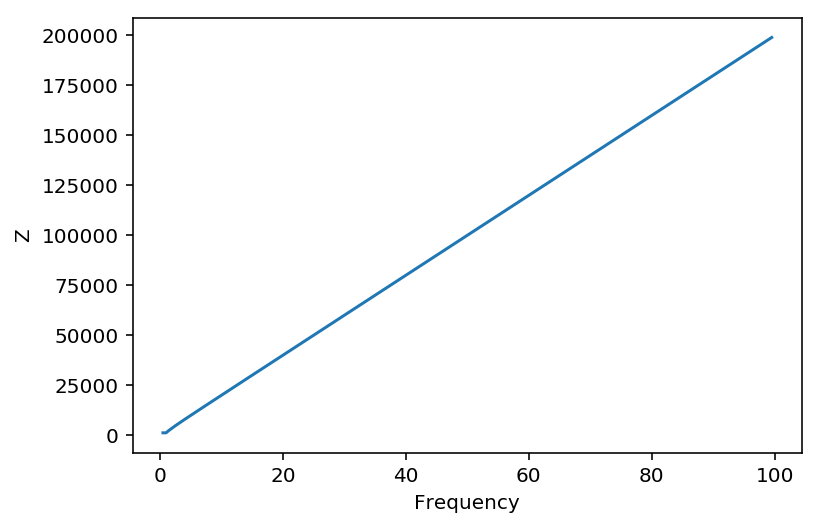

In [8]:
###### From lecture notes:
import math
import numpy as np
import matplotlib.pyplot as plt

#Define our own complex number class
class myComplex:

    # __init__ is required for a class and specifies what happens when a new object is created
    # in our case, the class holds two float numbers (the real and imaginary part) which are initialised
    # by the arguments passed, or set to 0. if no arguments are passed
    def __init__(self,x=0.,y=0.):
        self.re=x
        self.im=y
        self.R = math.sqrt(self.re**2+self.im**2) # Making R a property for ease

    # This are methods returning the modulus and phase of a complex number
#     def R(self):
#         return math.sqrt(self.re**2+self.im**2)
    
    def phi(self):
        return math.atan2(self.im,self.re)

    # Or we can set modulus and phase
    def setRphi(self,R,phi):
        self.re=R*math.cos(phi)
        self.im=R*math.sin(phi)
   
    # Here we overload the "+" operator to add two numbers
    def __add__(self,other):
        return myComplex(self.re+other.re,self.im+other.im)
    
    # Here we over the operator needed to print out complex numbers
    def __repr__(self):
        return '%f + %f i' %(self.re,self.im)

######

    # Overload of "-", to subtract 2 numbers
    def __sub___(self, other):
        return myComplex(self.re - other.re, self.im - other.im)
    
    # Overload of "*"
    def __mul__(self,other):
        return myComplex(self.re * other.re - self.im * other.im, self.re * other.im + self.im * other.re)
    
#    # Overload of "/", using conjugate
#     def __truediv__(self, other):
#         return myComplex((__mul__(self.re, conj(other)))/(other.re**2 + other.im**2))
    
    #Overload of "/"
    def __truediv2__(self, other):
        return myComplex((self.re * other.re + self.im * other.im) / (other.re**2 + other.im**2)), ((self.im * other.re - self.re * other.im) / (other.re**2 + other.im**2))
    
    
    # Finding complex conjugate
    def conj(self):
        return myComplex(self.re, - self.im)
    
    # Rotating by angle theta
    def rotate(self, theta_input):
        Th_fin = np.arccos(self.re / self.R) + theta_input #I suppose you could also use the 'phi' function here
        return myComplex(self.R*math.cos(Th_fin), self.R*math.sin(Th_fin))


# Impedence vs frequency

def ZCalc(R_, L, C, om): #Assuming all inputs are real. Using R_ to avoid any weird isssues with the R property
    return myComplex(R_, ((1/(om*C))-(om*L)))

# Moved  into the 'ZRPlot' function
# 
# def ZRlist(R_, L, C, input_list):
#     """Returns a list of Z vals for a given set of omega vals(So that we can plot them)"""
#     Z = []
#     for i in range(0, len(input_list)):
#         Z.append(ZCalc(R_, L, C, input_list[i]).R)
#     return(Z)

def GeneralListPlot(XList, YList, xlabel, ylabel):
    """A general function to plot 2 lists of floats, and label their axes"""
    plt.plot(XList, YList)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
    return()

# Plot mod Z vs omega, for L = 1000H, C=1 mF, R=480 Ohm
# 
# I wrote this without a function, but I think (given that I need to call it 5 times) I should use a function
# omega = np.arange(0.5, 100, 0.5) #Starting at 0 gives a 'divide by 0' error
# ZR = ZRlist(480, 1000, 0.001, omega)
# GeneralListPlot(omega, ZR, 'Frequency', 'Z')

def ZRPlot(R_, L, C, omega_min, omega_max, omega_step): # could also have it intake different vars to form the omega list
    omega_list = np.arange(omega_min, omega_max, omega_step)
    Zlist = []
    for i in range(0, len(omega_list)):
        Zlist.append(ZCalc(R_, L, C, omega_list[i]).R)
    GeneralListPlot(omega_list, Zlist, 'Frequency', 'Z')

print("Plot mod Z vs omega, for L = 1000H, C=1 mF, R=480 Ohm")
ZRPlot(480, 1000, 0.001, 0.5, 100, 0.5)

# Repeat with R=120 Ohm and 960 Ohm (and L=1000H and C=1 mF)
print("Repeat with R=120 Ohm")
ZRPlot(120, 1000, 0.001, 0.5, 100, 0.5)
print("and 960 Ohm")
ZRPlot(960, 1000, 0.001, 0.5, 100, 0.5)
# Repeat with L=200 H and L=2000 H (and R=480 Ohm and C=1 mF)
print("Repeat with L=200 H")
ZRPlot(480, 200, 0.001, 0.5, 100, 0.5)
print("and L=2000 H")
ZRPlot(480, 2000, 0.001, 0.5, 100, 0.5)


In [71]:
##### a = myComplex(0, 1)

myComplex.rotate(a, 90)

ZCalc(1, 5, 8, 45)